# Python 期末作業 - 預測Titanic乘客的存活率

李思瑩

### 匯入資料

In [6]:
import pandas as pd

url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic = pd.read_csv(url)
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 使用 describe() 看數字型變項之形態

In [7]:
#survived pclass sex age sibsp parch

#titanic["encoded_Sex","encode_Pclass"].value_counts()
titanic.describe()

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 整理變數 Age

29.0


C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


27.0
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.441268    0.523008   
std     257.353842    0.486592    0.836071   13.018747    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      

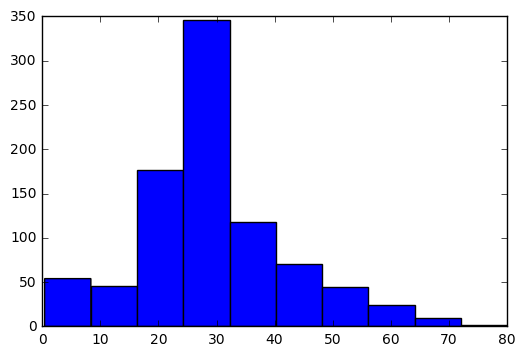

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#男性
filter = titanic["Sex"]=="male"
titanic_male = titanic[filter]
male_age_median = np.nanmedian(titanic_male["Age"]) # 要忽略 NaN
print(male_age_median)
new_age = np.where(titanic_male["Age"].isnull(), male_age_median, titanic_male["Age"])
titanic_male["Age"] = new_age

#女性
filter = titanic["Sex"]=="female"
titanic_female = titanic[filter]
female_age_median = np.nanmedian(titanic_female["Age"]) # 要忽略 NaN
print(female_age_median)
new_age = np.where(titanic_female["Age"].isnull(), female_age_median, titanic_female["Age"])
titanic_female["Age"] = new_age

#set titanic_male and titanic_female
titanic1 = [titanic_male, titanic_female] 
titanic2 = pd.concat(titanic1)
fare_median = np.nanmedian(titanic2["Fare"]) # 要忽略 NaN
imputed_Fare = np.where(titanic2["Fare"].isnull(), fare_median, titanic2["Fare"])
type(titanic2)
print(titanic2.shape)
print(titanic2.columns)
print(titanic2.describe())
plt.hist(titanic2["Age"])
plt.show()

### 將類別變數轉成 dummy variables

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic2["Sex"])
encoded_Pclass = label_encoder.fit_transform(titanic2["Pclass"])

age2 = np.array(titanic2["Age"])**2
#encoded_Age = label_encoder.fit_transform(np.array(titanic2["Age"])/5)

### model1. 使用 Logistic regression 建立模型

In [10]:
titanic_X = pd.DataFrame([encoded_Pclass, encoded_Sex, age2, imputed_Fare]).T
titanic_y = titanic2["Survived"]


# 切分訓練與測試資料 70% vs. 30%
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(titanic_X, titanic_y, test_size = 0.3)


# 建立模型
from sklearn import metrics, linear_model
LOG_regr = linear_model.LogisticRegression()
LOG_regr.fit(train_X, train_y)
# 預測
LOG_test_y_predicted = LOG_regr.predict(test_X)
# 準確率
LOG_accuracy = metrics.accuracy_score(test_y, LOG_test_y_predicted)
print(LOG_accuracy)

0.779850746269


### model2. 使用 SGD Classifier 建立模型

In [11]:
titanic_X = pd.DataFrame([encoded_Pclass, encoded_Sex, age2, imputed_Fare]).T
titanic_y = titanic2["Survived"]

from sklearn import metrics, linear_model
SGD_regr = linear_model.SGDClassifier()
SGD_regr.fit(train_X, train_y)
# 預測
SGD_test_y_predicted = SGD_regr.predict(test_X)
# 準確率
SGD_accuracy = metrics.accuracy_score(test_y, SGD_test_y_predicted)
print(SGD_accuracy)

0.358208955224


### model3. 使用 Support Vector Machines 建立模型

In [12]:
titanic_X = pd.DataFrame([encoded_Pclass, encoded_Sex, age2, imputed_Fare]).T
titanic_y = titanic2["Survived"]

from sklearn import metrics, svm
SVM_regr = svm.SVC()
SVM_regr.fit(train_X, train_y)
# 預測
SVM_test_y_predicted = SVM_regr.predict(test_X)
# 準確率
SVM_accuracy = metrics.accuracy_score(test_y, SVM_test_y_predicted)
print(SVM_accuracy)

0.69776119403


### model4. 使用 Decision Trees 建立模型

In [13]:
titanic_X = pd.DataFrame([encoded_Pclass, encoded_Sex, age2, imputed_Fare]).T
titanic_y = titanic2["Survived"]

from sklearn import metrics, tree
DT_regr = tree.DecisionTreeClassifier()
DT_regr.fit(train_X, train_y)
# 預測
DT_test_y_predicted = DT_regr.predict(test_X)
# 準確率
DT_accuracy = metrics.accuracy_score(test_y, DT_test_y_predicted)
print(DT_accuracy)

0.779850746269


### 選用 model1 應用於沒有答案的資料

In [15]:
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_test.csv"
to_submit = pd.read_csv(url)

#跟訓練資料作一樣的整理
#男性
filter = to_submit["Sex"]=="male"
to_submit_male = to_submit[filter]
to_submit_male_med = np.nanmedian(to_submit_male["Age"]) # 要忽略 NaN
print(to_submit_male_med)
imputed_Age = np.where(to_submit_male["Age"].isnull(), to_submit_male_med, to_submit_male["Age"])
to_submit_male["Age"] = imputed_Age

#女性
filter = to_submit["Sex"]=="female"
to_submit_female = to_submit[filter]
to_submit_female_med = np.nanmedian(to_submit_female["Age"]) # 要忽略 NaN
print(to_submit_female_med)
imputed_Age = np.where(to_submit_female["Age"].isnull(), to_submit_female_med, to_submit_female["Age"])
to_submit_female["Age"] = imputed_Age

#set to_submit_male and to_submit_female
to_submit1 = [to_submit_male, to_submit_female] 
to_submit2 = pd.concat(to_submit1)
fare_median = np.nanmedian(to_submit2["Fare"]) # 要忽略 NaN
imputed_Fare = np.where(to_submit2["Fare"].isnull(), fare_median, to_submit2["Fare"])


encoded_Sex_to_submit = label_encoder.fit_transform(to_submit["Sex"])
encoded_Pclass_to_submit = label_encoder.fit_transform(to_submit["Pclass"])
age2_to_submit = np.array(to_submit2["Age"])**2

to_submit_X = pd.DataFrame([encoded_Pclass_to_submit, encoded_Sex_to_submit, age2_to_submit, imputed_Fare]).T


# 預測
to_submit_y = LOG_regr.predict(to_submit_X)
print(to_submit_y)

# 準備要上傳的檔案
to_submit_dict = {"PassengerId": to_submit2["PassengerId"], "Survived": to_submit_y}
to_submit_df = pd.DataFrame(to_submit_dict)

# 輸出成 csv
to_submit_df.to_csv("model1.csv", index = False)

27.0
27.0
[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 選用 model2 應用於沒有答案的資料

In [16]:
# 預測
to_submit_y = SGD_regr.predict(to_submit_X)
print(to_submit_y)

# 準備要上傳的檔案
to_submit_dict = {"PassengerId": to_submit2["PassengerId"], "Survived": to_submit_y}
to_submit_df = pd.DataFrame(to_submit_dict)

# 輸出成 csv
to_submit_df.to_csv("model2.csv", index = False)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


### 選用 model3 應用於沒有答案的資料

In [17]:
# 預測
to_submit_y = SVM_regr.predict(to_submit_X)
print(to_submit_y)

# 準備要上傳的檔案
to_submit_dict = {"PassengerId": to_submit2["PassengerId"], "Survived": to_submit_y}
to_submit_df = pd.DataFrame(to_submit_dict)

# 輸出成 csv
to_submit_df.to_csv("model3.csv", index = False)

[0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]


### 選用 model4 應用於沒有答案的資料

In [ ]:
# 預測
to_submit_y = DT_regr.predict(to_submit_X)
print(to_submit_y)

# 準備要上傳的檔案
to_submit_dict = {"PassengerId": to_submit2["PassengerId"], "Survived": to_submit_y}
to_submit_df = pd.DataFrame(to_submit_dict)

# 輸出成 csv
to_submit_df.to_csv("model4.csv", index = False)